In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

# 载入数据

以下数据来自开源软件openair(http://davidcarslaw.github.io/openair/) 这是一个非常优秀的开源库。该库包含英国各个空气监测站的数据。该库是基于R语言的，所以可以先将数据导出为csv文件，然后再用python进行操作。本实验是基于2018-2019年间,大伦敦区域的Bloomsbury, Eltham, Harlington, Marylebone Road 和 N_Kensington的空气质量监测站

In [2]:
Bloomsbury=pd.read_csv('data/Bloomsbury.csv')
Eltham=pd.read_csv('data/Eltham.csv')
Harlington=pd.read_csv('data/Harlington.csv')
Marylebone_Road=pd.read_csv('data/Marylebone_Road.csv')
N_Kensington=pd.read_csv('data/N_Kensington.csv')

# 数据初探

下面的创建一些相关的数据结构，来存放以上的相关数据信息，方便我们之后对其进行批量操作

In [3]:
sites_name=['Bloomsbury','Eltham','Harlington','Marylebone_Road','N_Kensington']
air_pollutants_list=['nox','no2','no','o3','pm2.5','ws','wd','air_temp']

sites_dic={'Bloomsbury':Bloomsbury,
               'Eltham':Eltham,
                'Harlington':Harlington,
                'Marylebone_Road':Marylebone_Road,
                'N_Kensington':N_Kensington             
               }

先看一下Bloomsbury的信息。可以看出该文件记录了很多属性。但是我们需要的是nox,no2,no,o3,pm2.5,ws,wd,air_temp。因为有些空气污染物所有的监测点都有，但有些是部分监测站没有的。所以我们取了属性的交集，这样确保了数据的统一性。

In [4]:
Bloomsbury.head()

,site,code,date,nox,no2,no,o3,so2,pm10,pm2.5,v10,v2.5,nv10,nv2.5,ws,wd,air_temp
0,London Bloomsbury,CLL2,2018-01-01 00:00:00,18.52634,14.63439,2.53827,59.81291,NaN,11.4,9.0,0.0,1.9,11.4,11.6,5.6,262.7,5.7
1,London Bloomsbury,CLL2,2018-01-01 01:00:00,20.19538,17.29712,1.89020,53.63033,NaN,8.9,7.2,-1.4,1.4,10.3,10.3,5.1,257.7,5.3
2,London Bloomsbury,CLL2,2018-01-01 02:00:00,20.27883,17.54618,1.78219,54.45707,NaN,6.9,6.0,0.5,4.9,6.4,5.6,4.9,253.6,5.1
3,London Bloomsbury,CLL2,2018-01-01 03:00:00,18.65152,17.28520,0.89109,57.53039,NaN,5.6,1.5,1.6,2.7,4.0,3.3,4.8,250.4,5.0
4,London Bloomsbury,CLL2,2018-01-01 04:00:00,14.33288,12.90445,0.93160,60.87330,NaN,1.4,4.9,0.7,6.2,0.7,3.2,5.2,251.3,5.2


接下来我们要查看数据是否存在nan值。理想情况下，数据应该不存在nan值的。但是很不幸，下面的结果告诉我们nan值还很多。所以在实验之前，我们需要对空缺处进行填充。

In [5]:
for i in sites_name:
    print(i,':')
    print('o3为空的数量为:',sites_dic[i]['o3'].isnull().value_counts().values[1])
    print('nox为空的数量为:',sites_dic[i]['nox'].isnull().value_counts().values[1])
    print('no2为空的数量为:',sites_dic[i]['no2'].isnull().value_counts().values[1])
    print('no为空的数量为:',sites_dic[i]['no'].isnull().value_counts().values[1])
    print('pm2.5为空的数量为:',sites_dic[i]['pm2.5'].isnull().value_counts().values[1])
    print('ws为空的数量为:',sites_dic[i]['ws'].isnull().value_counts().values[1])
    print('wd为空的数量为:',sites_dic[i]['wd'].isnull().value_counts().values[1])
    print('air_temp为空的数量为:',sites_dic[i]['air_temp'].isnull().value_counts().values[1])
    print('----------------------')

Bloomsbury :
o3为空的数量为: 348
nox为空的数量为: 308
no2为空的数量为: 308
no为空的数量为: 307
pm2.5为空的数量为: 860
ws为空的数量为: 576
wd为空的数量为: 576
air_temp为空的数量为: 576
----------------------
Eltham :
o3为空的数量为: 65
nox为空的数量为: 595
no2为空的数量为: 595
no为空的数量为: 595
pm2.5为空的数量为: 1743
ws为空的数量为: 576
wd为空的数量为: 576
air_temp为空的数量为: 576
----------------------
Harlington :
o3为空的数量为: 471
nox为空的数量为: 753
no2为空的数量为: 753
no为空的数量为: 753
pm2.5为空的数量为: 537
ws为空的数量为: 576
wd为空的数量为: 576
air_temp为空的数量为: 576
----------------------
Marylebone_Road :
o3为空的数量为: 315
nox为空的数量为: 614
no2为空的数量为: 614
no为空的数量为: 614
pm2.5为空的数量为: 1725
ws为空的数量为: 576
wd为空的数量为: 576
air_temp为空的数量为: 576
----------------------
N_Kensington :
o3为空的数量为: 518
nox为空的数量为: 157
no2为空的数量为: 157
no为空的数量为: 157
pm2.5为空的数量为: 39
ws为空的数量为: 576
wd为空的数量为: 576
air_temp为空的数量为: 576
----------------------


我们可以通过图像反应出空值对整体的影响

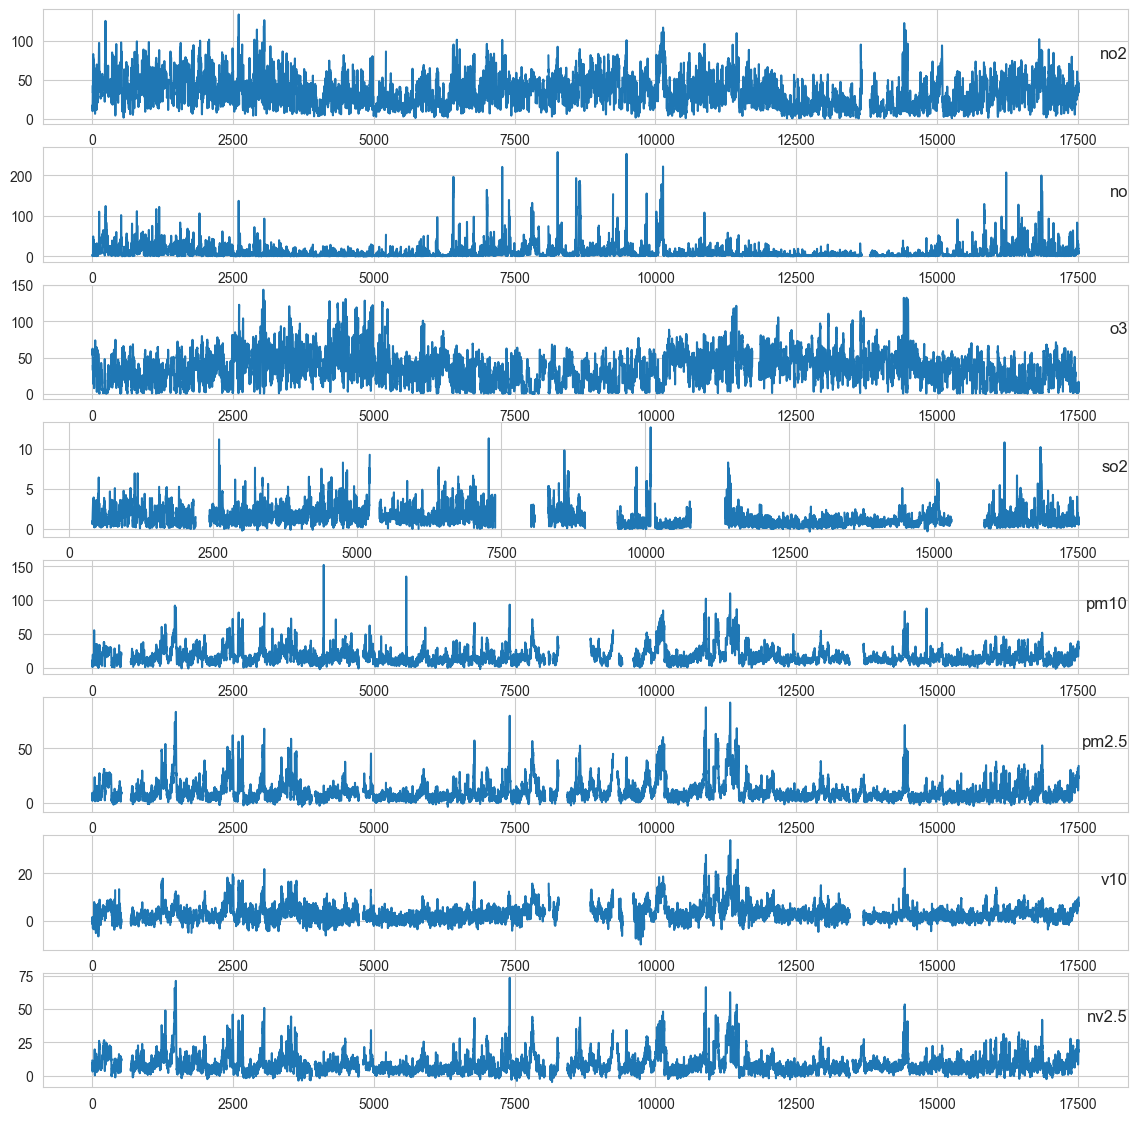

In [6]:
def show_graph(site):
  dataset=sites_dic[site]
  values = dataset.values

  columns = [4, 5, 6, 7, 8, 9, 10, 13]

  pyplot.figure(figsize=(14,14))
  i=1
  for column in columns:
      pyplot.subplot(len(columns), 1, i)
      pyplot.plot(values[:, column])
      pyplot.title(dataset.columns[column], y=0.5, loc='right')
      i += 1
  pyplot.show()

show_graph('Bloomsbury')

# 数据填充

数据填充部分，主要采用了论文[ST-MVL: Filling Missing Values in Geo-sensory Time Series Data](https://www.microsoft.com/en-us/research/publication/st-mvl-filling-missing-values-in-geo-sensory-time-series-data/) 中提到的IDW(Inverse Distance Weighting)方法 以及 线性插值法。

IDW：在这里因为IDW需要的是空间坐标的信息，所以我们需要先存放每个监测站的经纬度的值。

In [7]:
coordinate_dic={'Bloomsbury':[51.52229,-0.125889],
               'Eltham':[51.45258,0.070766],
                'Harlington':[51.48879,-0.441614],
                'Marylebone_Road':[51.52253,-0.154611],
                'N_Kensington':[51.52105,-0.213492]             
               }

注意，接下来的操作，我们不直接对原始数据进行操作，而是对其拷贝进行操作。这样可以避免一些问题的发生

In [8]:
import copy
Bloomsbury_copy=copy.deepcopy(Bloomsbury)
Eltham_copy=copy.deepcopy(Eltham)
Harlington_copy=copy.deepcopy(Harlington)
Marylebone_Road_copy=copy.deepcopy(Marylebone_Road)
N_Kensington_copy=copy.deepcopy(N_Kensington)

copy_dic={'Bloomsbury':Bloomsbury_copy,
               'Eltham':Eltham_copy,
                'Harlington':Harlington_copy,
                'Marylebone_Road':Marylebone_Road_copy,
                'N_Kensington':N_Kensington_copy             
               }

定义IDW函数

In [9]:
import math
def interpolation(lon, lat, lst,P=2):
    """
    :param lon:要插值的点的x
    :param lat:要插值的点的y
    :param lst:lst是已有数据的数组，结构为：[[x1，y1，z1]，[x2，y2，z2]，...]
    :return:返回值是插值点的值
    """
    p0 = [lon, lat]
    sum0 = 0
    sum1 = 0
    temp = []
    # 遍历获取该点距离所有采样点的距离
    for point in lst:
        if lon == point[0] and lat == point[1]:
            return point[2]
        Di = distance(p0, point)
        # new出来一个对象，不然会改变原来lst的值
        ptn = copy.deepcopy(point)
        ptn.append(Di)
        temp.append(ptn)
 
    # 根据上面ptn.append（）的值由小到大排序
    temp1 = sorted(temp, key=lambda point: point[3])
    # 遍历排序的前15个点，根据公式求出sum0 and sum1
    for point in temp1[0:]:
        sum0 += point[2] / math.pow(point[3], P)
        sum1 += 1 / math.pow(point[3], P)
        
    return sum0 / sum1
 
# 计算两点间的距离
def distance(p, pi):
    dis = (p[0] - pi[0]) * (p[0] - pi[0]) + (p[1] - pi[1]) * (p[1] - pi[1])
    m_result = math.sqrt(dis)
    return m_result

定义填充函数

In [10]:
def fullfill_missing(site):
    ls_temp=copy.deepcopy(sites_name)
    ls_temp.remove(site)
    
    for i in sites_dic[site].index.tolist():
        for j in air_pollutants_list:
            if(np.isnan(sites_dic[site].iloc[i][j])):            
                ls_temp2=[]
                for m in ls_temp:
                    if(not np.isnan(sites_dic[m].iloc[i][j])):
                        temp_value=copy.deepcopy(coordinate_dic[m])
                        temp_value.append(sites_dic[m].iloc[i][j])
                        ls_temp2.append(temp_value) 
                if(len(ls_temp2)!=0):#防止所有监测站都为空
                    copy_dic[site].loc[i,j]=interpolation(coordinate_dic[site][0],coordinate_dic[site][1],ls_temp2)

开始填充。时间有点慢

In [11]:
fullfill_missing('Bloomsbury')
fullfill_missing('Eltham')
fullfill_missing('Harlington')
fullfill_missing('Marylebone_Road')
fullfill_missing('N_Kensington')

查看剩余空值的数量。可以发现ws,wd,air_temp都还有大量的剩余。这意味着，可能同一时刻，这五个监测站都没有监测到风速，风向和空气温度。所以我们得继续插值

In [12]:
for i in sites_name:
    print(i,':')
    print('o3为空的数量为:',len(copy_dic[i])-copy_dic[i]['o3'].isnull().value_counts().values[0])
    print('nox为空的数量为:',len(copy_dic[i])-copy_dic[i]['nox'].isnull().value_counts().values[0])
    print('no2为空的数量为:',len(copy_dic[i])-copy_dic[i]['no2'].isnull().value_counts().values[0])
    print('no为空的数量为:',len(copy_dic[i])-copy_dic[i]['no'].isnull().value_counts().values[0])
    print('pm2.5为空的数量为:',len(copy_dic[i])-copy_dic[i]['pm2.5'].isnull().value_counts().values[0])
    print('ws为空的数量为:',len(copy_dic[i])-copy_dic[i]['ws'].isnull().value_counts().values[0])
    print('wd为空的数量为:',len(copy_dic[i])-copy_dic[i]['wd'].isnull().value_counts().values[0])
    print('air_temp为空的数量为:',len(copy_dic[i])-copy_dic[i]['air_temp'].isnull().value_counts().values[0])
    print('----------------------')

Bloomsbury :
o3为空的数量为: 0
nox为空的数量为: 0
no2为空的数量为: 0
no为空的数量为: 0
pm2.5为空的数量为: 0
ws为空的数量为: 576
wd为空的数量为: 576
air_temp为空的数量为: 576
----------------------
Eltham :
o3为空的数量为: 0
nox为空的数量为: 0
no2为空的数量为: 0
no为空的数量为: 0
pm2.5为空的数量为: 0
ws为空的数量为: 576
wd为空的数量为: 576
air_temp为空的数量为: 576
----------------------
Harlington :
o3为空的数量为: 0
nox为空的数量为: 0
no2为空的数量为: 0
no为空的数量为: 0
pm2.5为空的数量为: 0
ws为空的数量为: 576
wd为空的数量为: 576
air_temp为空的数量为: 576
----------------------
Marylebone_Road :
o3为空的数量为: 0
nox为空的数量为: 0
no2为空的数量为: 0
no为空的数量为: 0
pm2.5为空的数量为: 0
ws为空的数量为: 576
wd为空的数量为: 576
air_temp为空的数量为: 576
----------------------
N_Kensington :
o3为空的数量为: 0
nox为空的数量为: 0
no2为空的数量为: 0
no为空的数量为: 0
pm2.5为空的数量为: 0
ws为空的数量为: 576
wd为空的数量为: 576
air_temp为空的数量为: 576
----------------------


我们将直接采用线性插值

In [13]:
for i in sites_name:
    copy_dic[i]=copy_dic[i].interpolate(method='linear', axis=0)

C:\Users\jjw\AppData\Local\Temp\ipykernel_37748\3709612806.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  copy_dic[i]=copy_dic[i].interpolate(method='linear', axis=0)
C:\Users\jjw\AppData\Local\Temp\ipykernel_37748\3709612806.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  copy_dic[i]=copy_dic[i].interpolate(method='linear', axis=0)
C:\Users\jjw\AppData\Local\Temp\ipykernel_37748\3709612806.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  copy_dic[i]=copy_dic[i].interpolate(method='linear', axis=0)
C:\Users\jjw\AppData\Local\Temp\ipykernel_37748\3709612806.py:2: FutureWarning: DataFrame.interpolate with

接下来看看整体的插值效果

In [14]:
empty=[[],[],[],[],[],[],[],[]]  #用来存放空气污染物为nan值的索引
for i in range(len(air_pollutants_list)):
    em=Bloomsbury[air_pollutants_list[i]]
    ls=em[np.isnan(em)].index.tolist()
    empty[i]=ls

def show_graph2(site):
  dataset=sites_dic[site]
  dataset2=copy_dic[site]

  air_pollutants_list=['nox','no2','no','o3','pm2.5','ws','wd','air_temp']

  # plot each column
  pyplot.figure(figsize=(14,14))
  i=1
  for column in air_pollutants_list:
      pyplot.subplot(len(air_pollutants_list), 1, i)
      pyplot.plot(dataset.loc[:, column].values,linewidth=0.5)
      pyplot.title(column, y=0.5, loc='right')
      pyplot.scatter(empty[i-1],dataset2.loc[empty[i-1], column].values,color='red',s=0.4)
      i += 1
      
  pyplot.show()

红点就是我们的填充的值，可以发现，有些填充的值不是那么的好，这主要是由于利用IDW算法时，采样的样本太少，也就是监测站的数量太少导致的。同时也会有很多噪声的影响。为了降低噪声点对后期训练的影响，我们需要用滤波器对数据集进行处理。

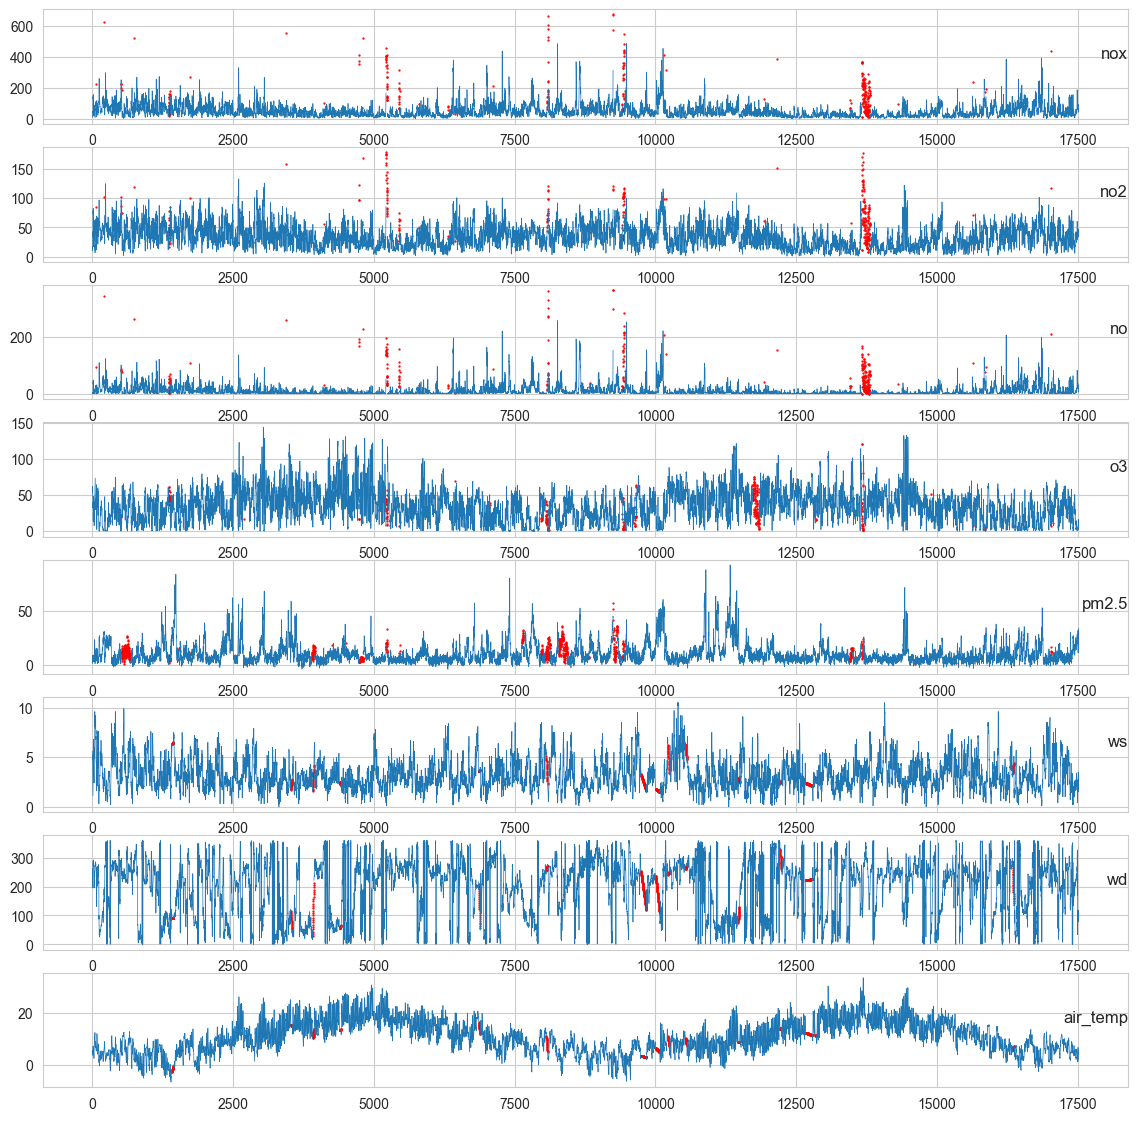

In [15]:
show_graph2('Bloomsbury')

# 消除噪声点

导入savgol_filter

In [16]:
from scipy.signal import savgol_filter

for i in sites_name:
    for j in air_pollutants_list:
        data=copy_dic[i].loc[:,j].values
        copy_dic[i].loc[:,j] = savgol_filter(data, 121, 3, mode= 'nearest')

可以看出噪声点基本上都被消除掉了。剩下的就可以保存，然后进行下一步的训练

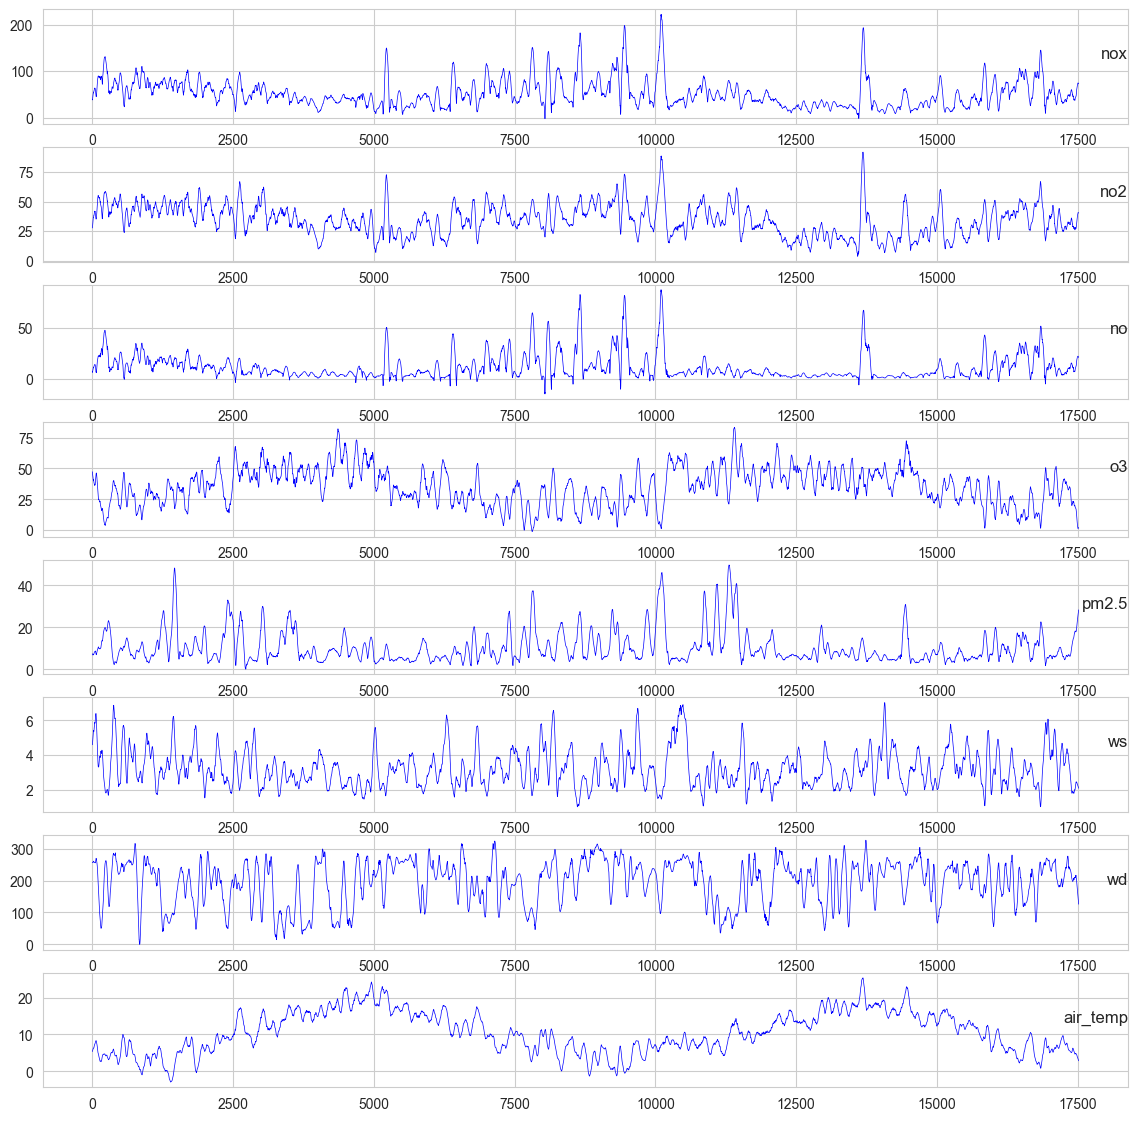

In [17]:
def show_graph3(site):
  dataset=sites_dic[site]
  dataset2=copy_dic[site]

  # plot each column
  pyplot.figure(figsize=(14,14))
  i=1
  for column in air_pollutants_list:
      pyplot.subplot(len(air_pollutants_list), 1, i)
      pyplot.plot(dataset2.loc[:, column].values,linewidth=0.5,color='b')
      pyplot.title(column, y=0.5, loc='right')
  #     pyplot.scatter(empty[i-1],dataset2.loc[empty[i-1], column].values,color='red',s=0.4)
      i += 1      
  pyplot.show()

show_graph3('Bloomsbury')

# 保存数据

In [19]:
for site in sites_name:
  copy_dic[site]=copy_dic[site][['site', 'code', 'date','nox', 'no2', 'no', 'o3','pm2.5','ws', 'wd', 'air_temp']]


copy_dic['Bloomsbury'].to_csv("data/Bloomsbury_clean.csv",index=False)
copy_dic['Eltham'].to_csv("data/Eltham_clean.csv",index=False)
copy_dic['Harlington'].to_csv("data/Harlington_clean.csv",index=False)
copy_dic['Marylebone_Road'].to_csv("data/Marylebone_Road_clean.csv",index=False)
copy_dic['N_Kensington'].to_csv("data/N_Kensington_clean.csv",index=False)

# 相关性检验

In [21]:
dataset=pd.read_csv('data/Marylebone_Road.csv')

In [22]:
dataset=dataset[['nox','no2','no','o3','pm2.5','ws','wd','air_temp']].values

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas.testing as tm

def ts_plot(data):
    fig = plt.figure(figsize=(14, 10))
    gs = gridspec.GridSpec(2,2)
 
    # data = np.random.normal(size=1000)
 
    ax_ts = fig.add_subplot(gs[0, 0:2])
    ax_acf = fig.add_subplot(gs[1, 0])
    ax_pacf = fig.add_subplot(gs[1, 1])
 
    ax_ts.plot(range(len(data)), data)
    plot_acf(data, ax=ax_acf, lags=30)
    plot_pacf(data, ax=ax_pacf, lags=30)
 
    plt.show()

从下图看出，如果不进行噪声处理，单一变量的自相关性基本上是为0的。

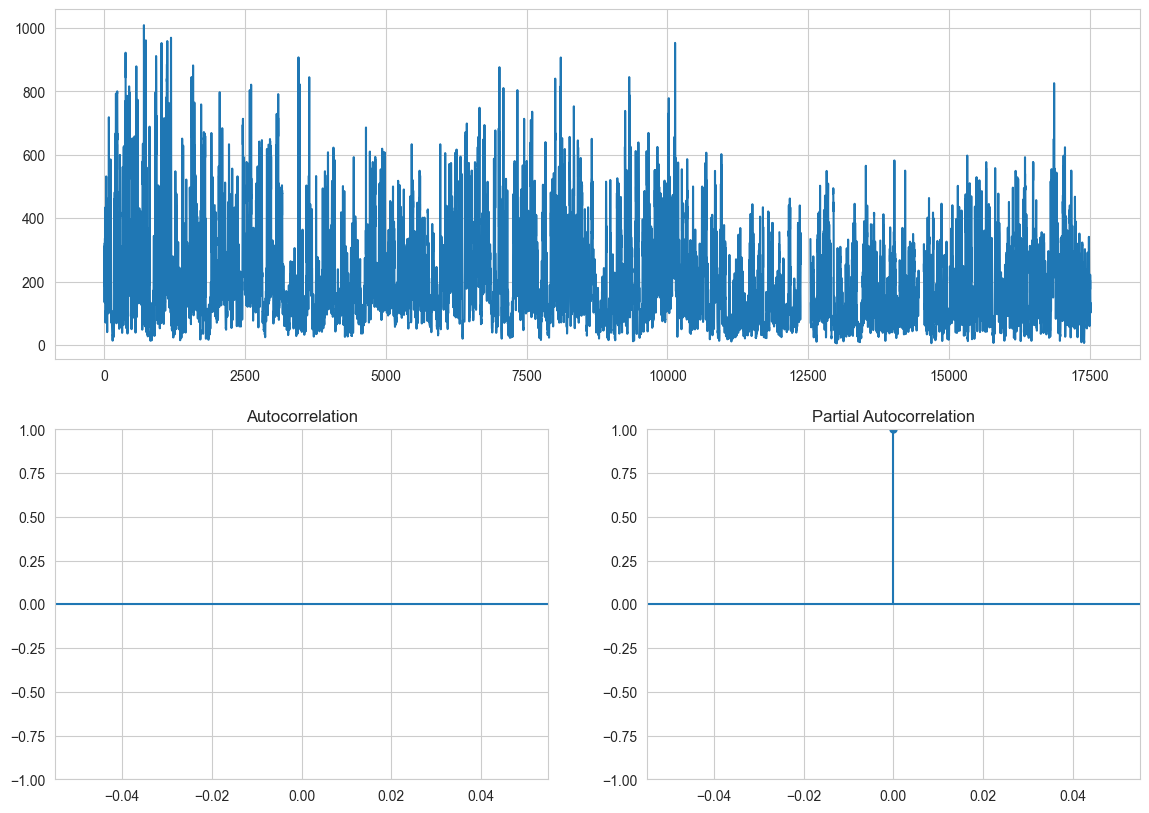

In [24]:
ts_plot(dataset[:,0])

经过了噪声处理之后的数据，则自相关性就很好

In [26]:
dataset=pd.read_csv('data/Marylebone_Road_clean.csv')
dataset=dataset[['nox','no2','no','o3','pm2.5','ws','wd','air_temp']].values

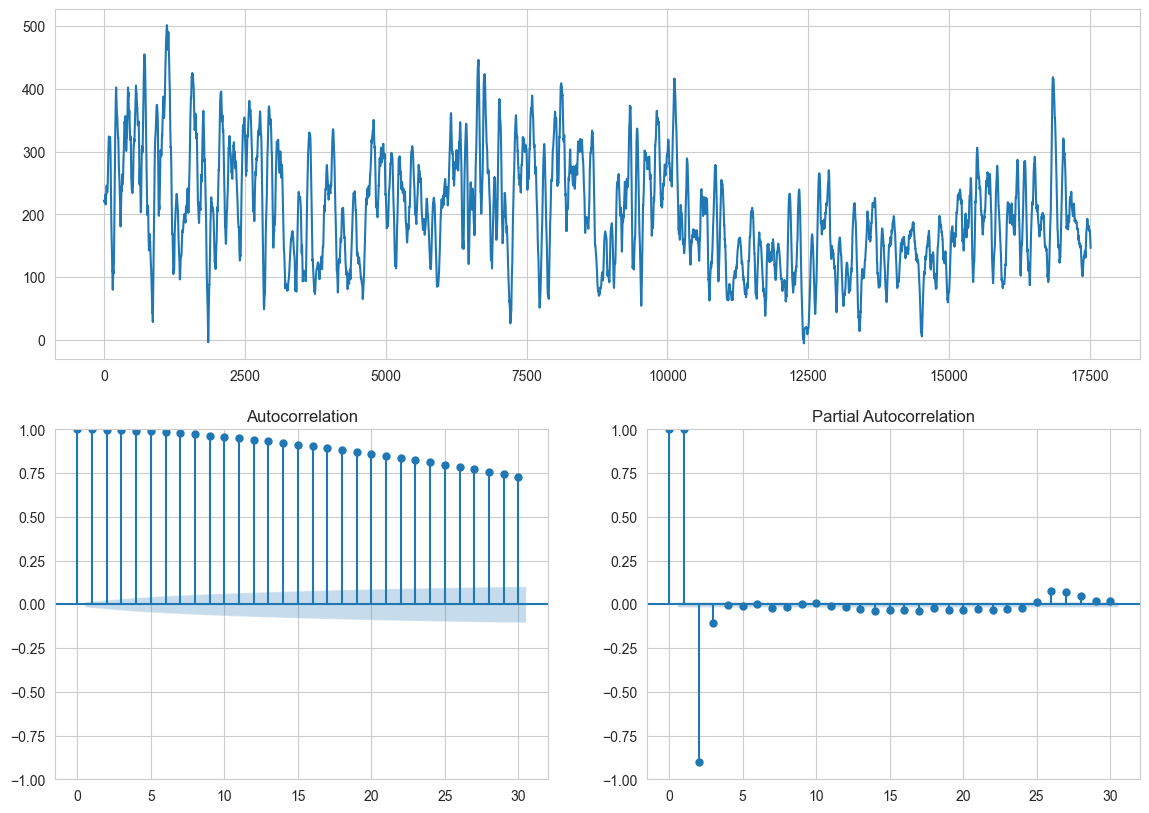

In [27]:
ts_plot(dataset[:,0])

由下面的相关性可以看出，对于一个监测站的数据，nox,no2,no的相关性比较强。其他都比较弱

In [28]:
dataset=pd.read_csv('data/Marylebone_Road_clean.csv')
dataset=dataset[['nox','no2','no','o3','pm2.5','ws','wd','air_temp']]

In [29]:
dataset.corr()

,nox,no2,no,o3,pm2.5,ws,wd,air_temp
nox,1.000000,0.856355,0.985960,-0.636563,0.218141,-0.042907,0.341422,-0.186093
no2,0.856355,1.000000,0.758106,-0.332974,0.260516,-0.119595,0.187165,0.052110
no,0.985960,0.758106,1.000000,-0.696227,0.191244,-0.015514,0.370650,-0.251863
o3,-0.636563,-0.332974,-0.696227,1.000000,-0.138074,0.136925,-0.379694,0.287855
pm2.5,0.218141,0.260516,0.191244,-0.138074,1.000000,-0.366109,-0.298176,-0.173460
ws,-0.042907,-0.119595,-0.015514,0.136925,-0.366109,1.000000,0.219211,-0.096239
wd,0.341422,0.187165,0.370650,-0.379694,-0.298176,0.219211,1.000000,0.018544
air_temp,-0.186093,0.052110,-0.251863,0.287855,-0.173460,-0.096239,0.018544,1.000000


<Axes: >

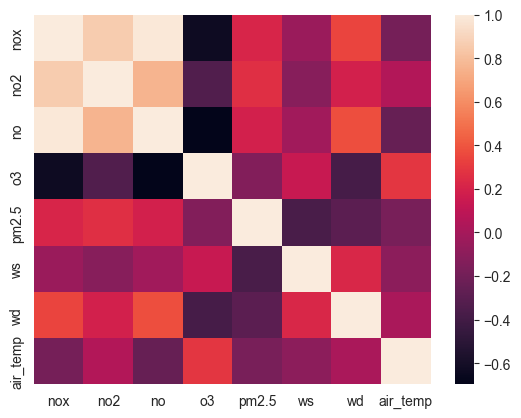

In [30]:
import seaborn as sns
sns.heatmap(dataset.corr())

接下来来看看不同监测站之间nox的相关性

In [31]:
Bloomsbury=pd.read_csv('data/Bloomsbury_clean.csv')
Eltham=pd.read_csv('data/Eltham_clean.csv')
Harlington=pd.read_csv('data/Harlington_clean.csv')
Marylebone_Road=pd.read_csv('data/Marylebone_Road_clean.csv')
N_Kensington=pd.read_csv('data/N_Kensington_clean.csv')

In [32]:
nox=Bloomsbury[['nox']]
nox['nox_E']=Eltham[['nox']]
nox['nox_H']=Harlington[['nox']]
nox['nox_M']=Marylebone_Road[['nox']]
nox['nox_N']=N_Kensington[['nox']]
nox=nox.rename(columns={'nox':'nox_B'})
nox.head()

C:\Users\jjw\AppData\Local\Temp\ipykernel_37748\477455888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nox['nox_E']=Eltham[['nox']]
C:\Users\jjw\AppData\Local\Temp\ipykernel_37748\477455888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nox['nox_H']=Harlington[['nox']]
C:\Users\jjw\AppData\Local\Temp\ipykernel_37748\477455888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,nox_B,nox_E,nox_H,nox_M,nox_N
0,38.719371,10.387007,25.652376,219.745313,18.634584
1,38.976582,10.823717,26.603729,221.095446,19.176644
2,39.251382,11.238689,27.500740,222.430163,19.723134
3,37.985254,11.546266,28.379700,222.483880,20.133219
4,38.973919,11.794165,29.266844,221.593263,19.865833


可以看出不同监测站之间的相关性还是挺高的

In [33]:
nox.corr()

,nox_B,nox_E,nox_H,nox_M,nox_N
nox_B,1.000000,0.775509,0.727980,0.308434,0.799395
nox_E,0.775509,1.000000,0.839863,0.325373,0.865339
nox_H,0.727980,0.839863,1.000000,0.416226,0.892520
nox_M,0.308434,0.325373,0.416226,1.000000,0.409708
nox_N,0.799395,0.865339,0.892520,0.409708,1.000000


<Axes: >

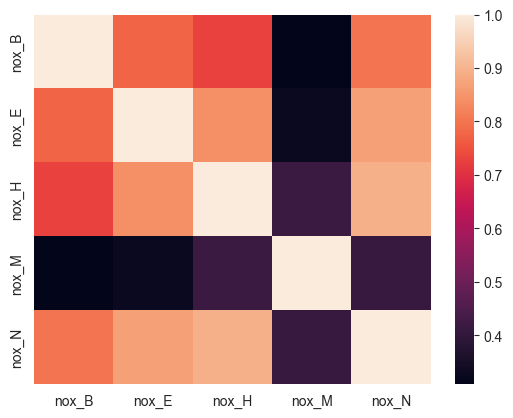

In [34]:
sns.heatmap(nox.corr())

看看不同站点之间的o3的相关性

C:\Users\jjw\AppData\Local\Temp\ipykernel_37748\1097453476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o3['o3_E']=Eltham[['o3']]
C:\Users\jjw\AppData\Local\Temp\ipykernel_37748\1097453476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o3['o3_H']=Harlington[['o3']]
C:\Users\jjw\AppData\Local\Temp\ipykernel_37748\1097453476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

<Axes: >

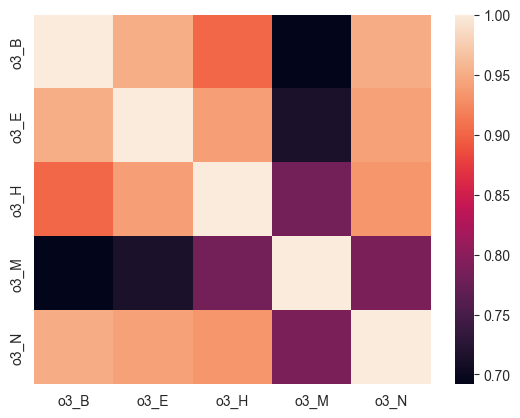

In [35]:
o3=Bloomsbury[['o3']]
o3['o3_E']=Eltham[['o3']]
o3['o3_H']=Harlington[['o3']]
o3['o3_M']=Marylebone_Road[['o3']]
o3['o3_N']=N_Kensington[['o3']]
o3=o3.rename(columns={'o3':'o3_B'})
sns.heatmap(o3.corr())

# Critical thinking

为什么Marylebone road的站点的数据和Eltham和Bloomsbury的相关性那么差？

In [36]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

查看图片。我可以理解Marylebone Road离Eltham远，所以相关性差。但是Bloomsbury离那么近，为什么相关性也差呢。这很显然与地理学第一定律相违背了。所以我从几个角度猜测了原因。最主要的原因可能就是风向的影响。其次是伦敦城内建筑的高度影响（这个猜测可能不成立，以你为Bloomsbury和Marylebone Road真的是离的太近了。）

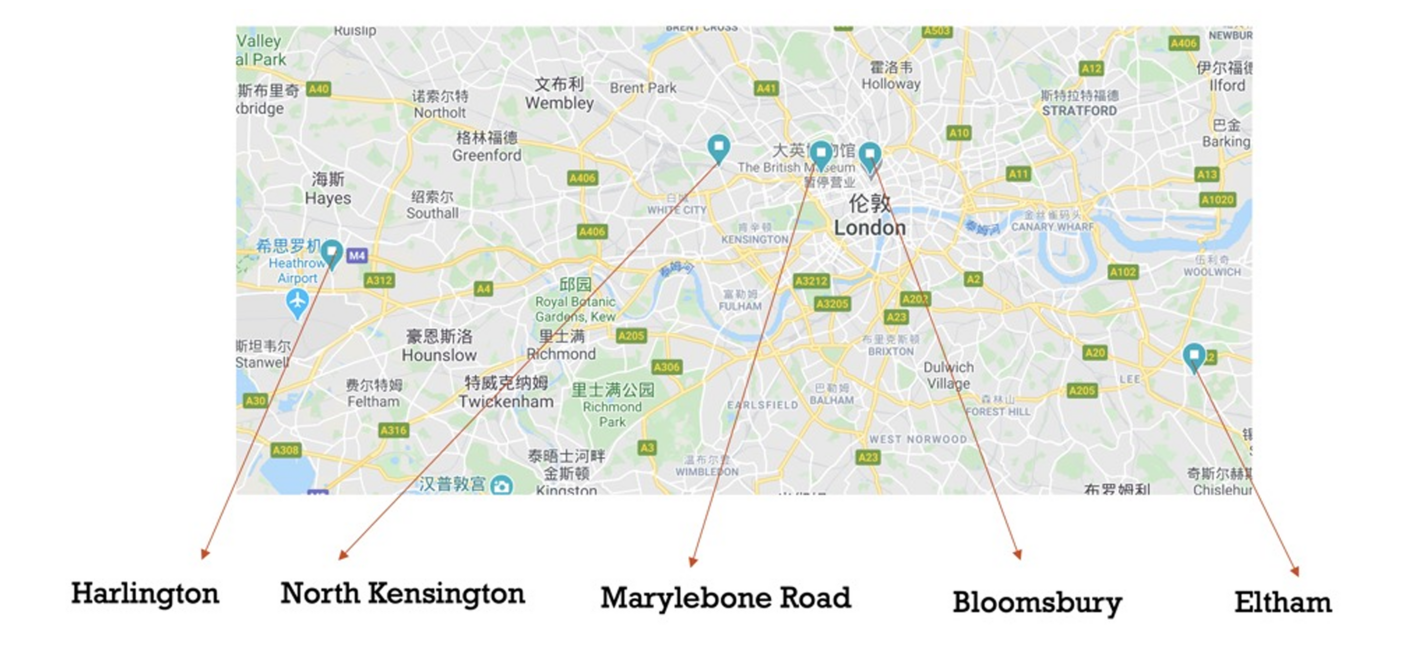

In [37]:
imShow('pic/map.jpg')

对于风向这个问题，得借助于windrose图来反应一下。这时候还是要借助一下openair的帮助。可以看出，伦敦市场刮西南风，而Marylebone Road和Bloomsbury是相对平行的，所以这两者之间很难会因为刮风的原因产生关联性。其次，如果留心观察google map上的卫星地图，你会发现Marylebone Road北部就是摄政公园，相当大的开阔地。而Bloomsbury北部还是高楼大厦，这就导致了Bloomsbury那边的空气污染物容易受到高楼大厦的影响而聚集，而Marylebone和Eltham, Harlington一样，都具备相同的开阔场所，不易聚集，相关性也相对高一点